#Self Organizing Map

##Installing MiniSom Package

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=c85412cd13a18f7b1598957aac4cf7f5848956b0b5aad5776531d468e0e82845
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd

Mounting Google Drive


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Setting up directory

In [4]:
%cd gdrive/My\ Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


## Importing the dataset

In [5]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

##Training the SOM


In [7]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 14, sigma= 1.0, learning_rate = 0.5, random_seed = 29)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100000)

##Visualizing the results


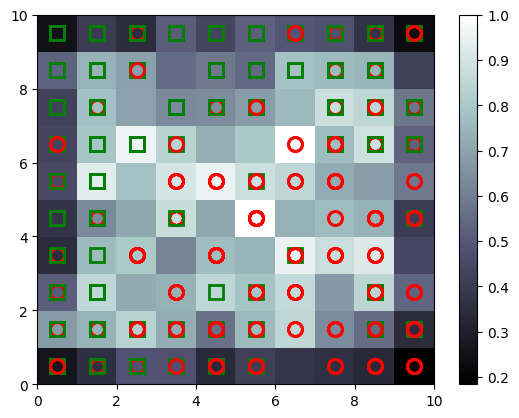

In [8]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [9]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,5)], mappings[(2,6)], mappings[(6,3)]), axis = 0)
frauds.shape[0]

17

##Mapping back to the fraud IDs



In [10]:
indx=[]
for i in range(frauds.shape[0]):
  for j in range(X.shape[0]):
    if (frauds[i,:]== X[j,:]).all():
      indx.append(j)
print(indx)

[143, 146, 286, 360, 242, 247, 322, 486, 564, 46, 131, 133, 167, 201, 399, 407, 556]


###Printing the fraudulent clients

In [11]:
print('Fraud Customer IDs')
for i in indx:
  print(dataset.iloc[i,0],y[i])

Fraud Customer IDs
15654859 1
15723827 1
15725028 1
15731989 1
15750921 1
15728010 1
15689268 1
15744423 1
15706394 1
15648069 0
15801473 0
15694666 0
15699238 1
15593959 0
15577771 0
15742009 0
15721504 0
